# MNIST deez nuts

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import tensorflow.keras.backend as K


In [17]:
from tensorflow.keras.datasets import mnist

In [18]:
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [23]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [32]:
h=model.fit(X_train, y_train_cat, batch_size=128, epochs=100, verbose=1, validation_split=0.3)

Epoch 1/100
329/329 [==============================] - 16s 47ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0452 - val_accuracy: 0.9868
Epoch 2/100
329/329 [==============================] - 16s 50ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0436 - val_accuracy: 0.9891
Epoch 3/100
329/329 [==============================] - 20s 60ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0377 - val_accuracy: 0.9898
Epoch 4/100
329/329 [==============================] - 22s 66ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0960 - val_accuracy: 0.9800
Epoch 5/100
329/329 [==============================] - 21s 63ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0534 - val_accuracy: 0.9869
Epoch 6/100
329/329 [==============================] - 19s 59ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0488 - val_accuracy: 0.9887
Epoch 7/100
329/329 [==============================] - 19s 58ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0636 - val_ac

329/329 [==============================] - 24s 74ms/step - loss: 6.5281e-11 - accuracy: 1.0000 - val_loss: 0.1624 - val_accuracy: 0.9901
Epoch 57/100
329/329 [==============================] - 18s 55ms/step - loss: 5.1090e-11 - accuracy: 1.0000 - val_loss: 0.1626 - val_accuracy: 0.9900
Epoch 58/100
329/329 [==============================] - 18s 56ms/step - loss: 4.8251e-11 - accuracy: 1.0000 - val_loss: 0.1628 - val_accuracy: 0.9900
Epoch 59/100
329/329 [==============================] - 25s 75ms/step - loss: 2.8383e-11 - accuracy: 1.0000 - val_loss: 0.1634 - val_accuracy: 0.9901
Epoch 60/100
329/329 [==============================] - 26s 79ms/step - loss: 2.8383e-11 - accuracy: 1.0000 - val_loss: 0.1638 - val_accuracy: 0.9900
Epoch 61/100
329/329 [==============================] - 23s 68ms/step - loss: 2.2707e-11 - accuracy: 1.0000 - val_loss: 0.1646 - val_accuracy: 0.9900
Epoch 62/100
329/329 [==============================] - 18s 53ms/step - loss: 2.5545e-11 - accuracy: 1.0000 - val

In [37]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.1119 - accuracy: 0.9917


[0.11186916381120682, 0.9916999936103821]

Text(0.5, 0, 'Epochs')

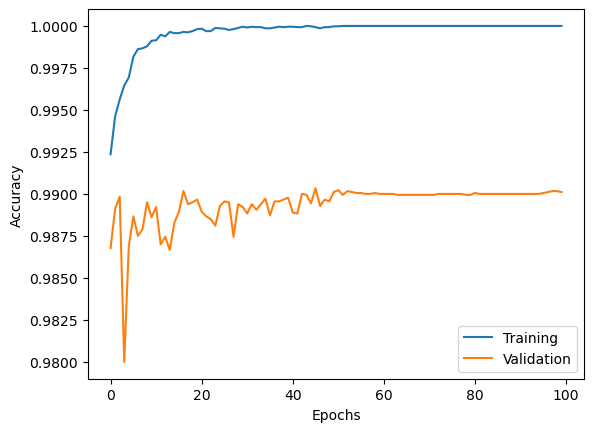

In [41]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [42]:
model.save('./mnist.keras')

In [43]:
model.save('./mnist_keras.h5')